<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Kopie_von_Load_and_preprocess_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Select stations and time period 123


In [2]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

# Install packages

In [3]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Load data

In [4]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-20


In [5]:
twodaysago = today - datetime.timedelta(days=2)

In [6]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [7]:
link = linkFromDate(twodaysago)

In [8]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [9]:
raw_data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(raw_data is None) :
      raw_data = df
    else :
      raw_data = pd.concat([raw_data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
raw_data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 24300K .......... .......... .......... .......... .......... 44.6M
 24350K .......... .......... .......... .......... .......... 26.7M
 24400K .......... .......... .......... .......... .......... 45.3M
 24450K .......... .......... .......... .......... .......... 33.4M
 24500K .......... .......... .......... .......... ..........  421K
 24550K .......... .......... .......... .......... .......... 41.9M
 24600K .......... .......... .......... .......... .......... 21.4M
 24650K .......... .......... .......... .......... .......... 20.6M
 24700K .......... .......... .......... .......... .......... 25.9M
 24750K .......... .......... .......... .......... .......... 33.2M
 24800K .......... .......... .......... .......... .......... 13.5M
 24850K .......... .......... .......... .......... .......... 40.9M
 24900K .......... .......... .......... .......... .......... 30.8M
 24950K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.236888e+07,1.236888e+07,1.236888e+07,1.236888e+07,1.236888e+07,1.236888e+07
mean,1.642184e+00,1.803551e+00,1.697194e+00,7.826112e-01,7.738146e-01,7.513052e-01
std,5.518128e-02,2.314101e-01,3.613828e-01,4.127125e-01,4.186218e-01,4.325576e-01
min,-1.000000e-03,0.000000e+00,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.799000e+00,1.739000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.639000e+00,1.829000e+00,1.769000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.669000e+00,1.859000e+00,1.799000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.989000e+00,4.480000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [10]:
raw_data.head(20)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-05-21 22:00:57+00:00,40d40430-2b76-4fea-9290-ec04583696f8,1.599,1.809,0.000,1,1,0
1,2024-05-21 22:01:58+00:00,0c835ecb-1135-4c62-a869-15782a039cc2,1.649,1.879,1.819,1,1,1
2,2024-05-21 22:01:58+00:00,44eb291f-06e6-4d55-8ad3-9d98ba21011f,1.639,1.809,1.749,1,1,1
3,2024-05-21 22:01:58+00:00,ac907861-c6ea-4652-b10c-b45306aefad9,1.519,1.799,1.739,0,1,0
4,2024-05-21 22:01:58+00:00,099135a2-6ee7-4f1f-963f-f634f49812d0,1.669,1.869,1.819,1,3,3
5,2024-05-21 22:01:58+00:00,a40f8609-356c-4a23-9a21-97ec53b79ce8,1.649,1.869,1.809,1,1,1
6,2024-05-21 22:01:58+00:00,f272902b-aca8-46a0-ac71-506521a206f4,1.649,1.879,1.819,1,1,1
7,2024-05-21 22:01:58+00:00,d2ba52c2-6f83-45bd-abdc-660a878976df,1.639,1.809,1.759,1,1,1
8,2024-05-21 22:01:58+00:00,a30fba5d-ccbf-4609-a6a3-106dab6c7964,1.639,1.819,1.759,1,1,1
9,2024-05-21 22:03:00+00:00,7be73e7c-1887-493c-8e70-3bbbaf455707,1.689,0.000,0.000,1,0,0


# Data cleansing and preprocessing

**Filtern nach Tankstellen in Pforzheim:**

In [11]:
# Filtern des Datensatzes nach den IDs in ids_pf
data = raw_data[raw_data['station_uuid'].isin(ids_pf)]

In [12]:
data.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
1032,2024-05-21 23:49:00+00:00,7a8d7a4a-a898-48c1-9420-f4a843d3d32e,1.539,1.779,1.719,1,1,1
2606,2024-05-22 03:01:46+00:00,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7,1.709,1.909,1.849,1,1,1
3141,2024-05-22 03:01:46+00:00,4153a547-046a-410c-a575-968f21f1ce66,1.709,1.909,1.849,1,1,1
3142,2024-05-22 03:01:46+00:00,d6e30bca-f474-4e02-aef2-56bd5c2545d9,1.709,1.909,1.849,1,1,1
4141,2024-05-22 03:01:46+00:00,a839b4f0-ec0d-474a-a839-4ada95a6ca8a,1.629,1.839,1.779,1,1,1


**Umwandlung des Datums zur Vorbereitung der Umcodierung des Datensatzes:**
* Datumsspalte in Datumsformat umwandeln
* Zeitzone anpassen (die bisherige Zeitzone war UTC)
* Zeitzone entfernen (da alle untersuchten in derselben Zeitzone sind)
* Datum als Index setzen (erleichtert den Zugriff und somit die geplante Umwandlung)
* Index auf nächste volle Minute runden (um die Daten zu vereinheitlichen)



In [13]:
# Step 1: Parse the 'date' column to datetime, assuming it's already timezone-aware
data['date'] = pd.to_datetime(data['date'])

# Convert to 'Europe/Berlin' timezone and then remove the timezone information
data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)

data.set_index('date', inplace=True)

data.index = data.index.round('T')  # 'T' represents minute frequency


<ipython-input-13-33c01f873e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-13-33c01f873e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)


**Erstellung eines neuen Dataframes für die umgewandelten Daten:**
* Das neue Dataframe enthält einen Datums- und Zeitindex für jede Minute innerhalb des Untersuchunszeitraums
* Dieses Vorgehen ermöglicht konsistente Analysen

In [14]:
# Step 2: Create a new DataFrame with a datetime index for every minute
start_date = data.index.min()
end_date = data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='T')  # 'T' for minute frequency
df = pd.DataFrame(index=all_dates)

**Füllung des neuen Dataframes mit Daten:**
* In temporären Dataframes werden die Daten aus dem ursprünglichen Dateframe übernommen (also nur immer wenn sich der Preis geändert hat): Dabei gibt es ein temporäres Dateframe für jede Kombination aus Tankstelle und Kraftstoffart. Die Kombination wird durch den neuen Spaltentitel reflektiert, sodass die Daten im Nachhinein gut fusioniert werden können.
* Es werden Duplikate im Index des temporären Dataframes gelöscht, um sicherzustellen, dass jeder Zeitpunkt einzigarti ist.
* Die temporären Dataframes werden neu indiziert, um mit dem Index des gewünschten Dataframes df übereinzustimmen. Fehlende Werte werden "vorwärts gefüllt", d.h. der letzte bekannte Preis wird übernommen bei NA-Werten.
* Die Dataframes werden mit dem gewünschten Dataframe fusioniert

In [15]:
# Step 3: Expand dataset for each station and fuel type
# Create columns for each station and fuel type
for station in data['station_uuid'].unique():
    for fuel_type in ['diesel', 'e5', 'e10']:
        # Create a temporary DataFrame for each station and fuel type
        temp_data = data[(data['station_uuid'] == station) & (data[f"{fuel_type}change"] == 1)]
        temp_data = temp_data[[fuel_type]].rename(columns={fuel_type: f"{station}_{fuel_type}"})

        # Ensure there's no duplicate index before reindexing
        temp_data = temp_data[~temp_data.index.duplicated(keep='first')]

        # Reindex the temp_data to match 'df', forward filling the missing values
        temp_data_reindexed = temp_data.reindex(df.index, method='ffill')

        # Join the reindexed data with 'df'
        df = df.join(temp_data_reindexed, how='left')

**Auffüllen der Preise:**
Dieser Code füllt fehlende Preisdaten im DataFrame df vorwärts auf.

Begründung:
Nachdem die temporären Dataframes mit dem gewünschten Dataframe zusammengeführt wurden, können weiterhin fehlende Werte auftreten. Dies liegt daran, dass nicht alle Tankstellen zu jedem Zeitpunkt Preisdaten für jeden Kraftstofftyp haben. Die Zusammenführung fügt neue Spalten zu df hinzu, aber für Zeiten, zu denen keine Preisdaten für eine bestimmte Tankstelle vorhanden waren, bleiben die Werte in diesen neuen Spalten leer.

In [16]:
# Step 4: Forward fill the prices
df.ffill(inplace=True)

In [17]:
df.head()

,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_diesel,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_e5,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_e10,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_diesel,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_e5,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_e10,4153a547-046a-410c-a575-968f21f1ce66_diesel,4153a547-046a-410c-a575-968f21f1ce66_e5,4153a547-046a-410c-a575-968f21f1ce66_e10,d6e30bca-f474-4e02-aef2-56bd5c2545d9_diesel,...,35d5f441-d930-4993-adf4-ee1abdf14000_e10,71ee41a5-8e67-4c50-85ab-37b95f1ec76e_diesel,71ee41a5-8e67-4c50-85ab-37b95f1ec76e_e5,71ee41a5-8e67-4c50-85ab-37b95f1ec76e_e10,b0e03550-8c80-4917-92e7-db40e975d9f2_diesel,b0e03550-8c80-4917-92e7-db40e975d9f2_e5,b0e03550-8c80-4917-92e7-db40e975d9f2_e10,0dc6786a-38e4-4576-8848-335975dea87b_diesel,0dc6786a-38e4-4576-8848-335975dea87b_e5,0dc6786a-38e4-4576-8848-335975dea87b_e10
2024-05-22 01:49:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-22 01:50:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-22 01:51:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-22 01:52:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-22 01:53:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Datum als Spalte speichern um Datentransfer zu R zu vereinfachen:**

In [18]:
df.reset_index(inplace=True, drop=False)  # 'drop=False' ensures the index is added as a column, not discarded

In [19]:
# Assuming you've already converted the index to a column using reset_index
df = df.rename(columns={'index': 'date'})

**Aus dem Datum die Stunde, den wochentag und die Minute extrahieren:**

In [20]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute

**Spalten umbenennen damit sie besser lesbar sind:**

In [21]:
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Function to apply the mapping to column names
def rename_columns(column_name):
    for uuid in station_names.keys():
        if uuid in column_name:
            # Replace UUID with a placeholder or a specific name if provided
            new_name = station_names[uuid]
            return column_name.replace(uuid, new_name if new_name else "StationNamePlaceholder")
    return column_name

# Rename the columns based on the mapping
df.columns = [rename_columns(col) for col in df.columns]

In [31]:
df.head(10000)

,date,SB_Eutinger_diesel,SB_Eutinger_e5,SB_Eutinger_e10,Aral_Lochaecker_diesel,Aral_Lochaecker_e5,Aral_Lochaecker_e10,Aral_Karlsruher_diesel,Aral_Karlsruher_e5,Aral_Karlsruher_e10,...,Shell_Zerrenner_e10,Shell_Buchbusch_diesel,Shell_Buchbusch_e5,Shell_Buchbusch_e10,Aral_Armsel_diesel,Aral_Armsel_e5,Aral_Armsel_e10,hour,weekday,minute
0,2024-05-22 01:49:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,49
1,2024-05-22 01:50:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,50
2,2024-05-22 01:51:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,51
3,2024-05-22 01:52:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,52
4,2024-05-22 01:53:00,1.539,1.779,1.719,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-05-29 00:24:00,1.559,1.779,1.719,1.689,1.879,1.819,1.689,1.829,1.769,...,1.759,1.619,1.829,1.769,1.669,1.819,1.759,0,2,24
9996,2024-05-29 00:25:00,1.559,1.779,1.719,1.689,1.879,1.819,1.689,1.829,1.769,...,1.759,1.619,1.829,1.769,1.669,1.819,1.759,0,2,25
9997,2024-05-29 00:26:00,1.559,1.779,1.719,1.689,1.879,1.819,1.689,1.829,1.769,...,1.759,1.619,1.829,1.769,1.669,1.819,1.759,0,2,26
9998,2024-05-29 00:27:00,1.559,1.779,1.719,1.689,1.879,1.819,1.689,1.829,1.769,...,1.759,1.619,1.829,1.769,1.669,1.819,1.759,0,2,27


In [41]:
from google.colab import files
WBW_df.to_csv('Wettbewerber.csv', index=False)
files.download('Wettbewerber.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

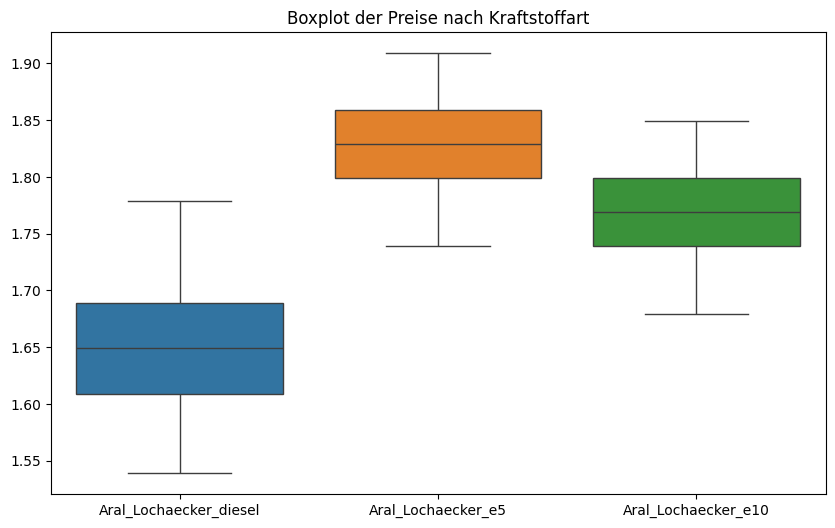

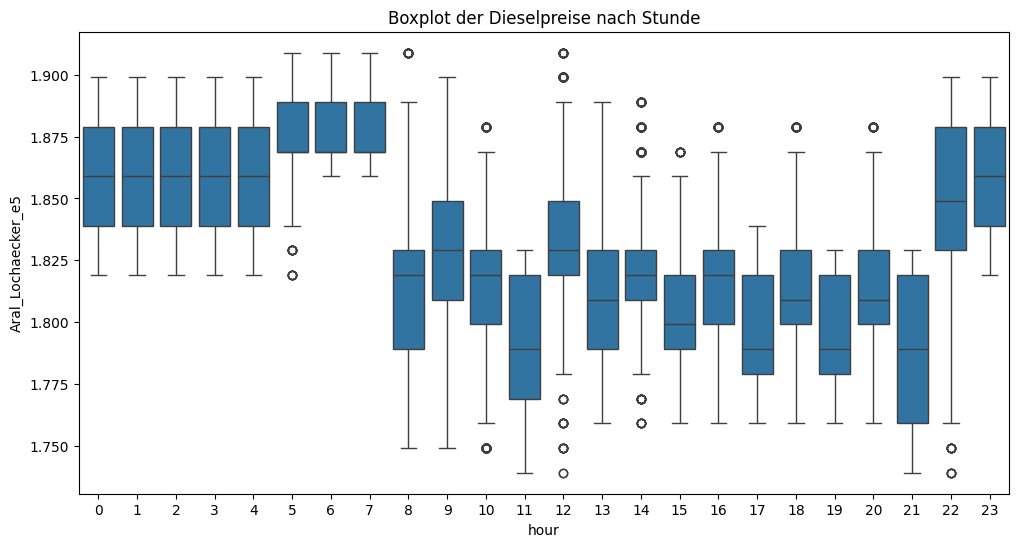

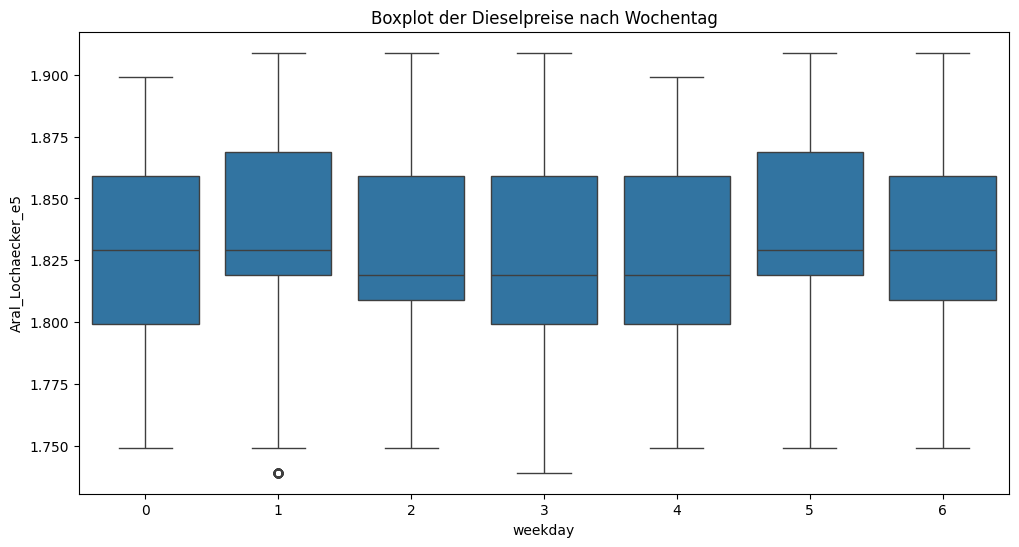

In [33]:
# 2. Durchschnittliche Preise nach Stunde
average_prices_hour = df.groupby('hour').mean()

# 3. Durchschnittliche Preise nach Wochentag
average_prices_weekday = df.groupby('weekday').mean()

# 4. Standardabweichung der Preise nach Stunde
std_prices_hour = df.groupby('hour').std()

# 5. Standardabweichung der Preise nach Wochentag
std_prices_weekday = df.groupby('weekday').std()

# 6. Anzahl der Preisänderungen
price_changes = df.diff().apply(lambda x: (x != 0).sum())

# 7. Minimale und maximale Preise nach Stunde
min_prices_hour = df.groupby('hour').min()
max_prices_hour = df.groupby('hour').max()

# 8. Minimale und maximale Preise nach Wochentag
min_prices_weekday = df.groupby('weekday').min()
max_prices_weekday = df.groupby('weekday').max()

# 9. Visualisierungen
# Boxplot der Preise nach Kraftstoffart
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10']])
plt.title('Boxplot der Preise nach Kraftstoffart')
plt.show()


# Boxplot der Preise nach Stunde
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Stunde')
plt.show()

# Boxplot der Preise nach Wochentag
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Wochentag')
plt.show()


In [39]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10',
    'JET_Luisen_diesel', 'JET_Luisen_e5', 'JET_Luisen_e10',
    'SB_Eutinger_diesel', 'SB_Eutinger_e5', 'SB_Eutinger_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_df = df[WBW_columns]

# Anzeigen der ersten paar Zeilen des neuen DataFrames
WBW_df.head()


,date,weekday,hour,minute,Shell_Buchbusch_diesel,Shell_Buchbusch_e5,Shell_Buchbusch_e10,Aral_Lochaecker_diesel,Aral_Lochaecker_e5,Aral_Lochaecker_e10,JET_Luisen_diesel,JET_Luisen_e5,JET_Luisen_e10,SB_Eutinger_diesel,SB_Eutinger_e5,SB_Eutinger_e10
0,2024-05-22 01:49:00,2,1,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539,1.779,1.719
1,2024-05-22 01:50:00,2,1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539,1.779,1.719
2,2024-05-22 01:51:00,2,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539,1.779,1.719
3,2024-05-22 01:52:00,2,1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539,1.779,1.719
4,2024-05-22 01:53:00,2,1,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539,1.779,1.719


<ipython-input-42-3e778663e482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WBW_df['date'] = pd.to_datetime(WBW_df['date'])


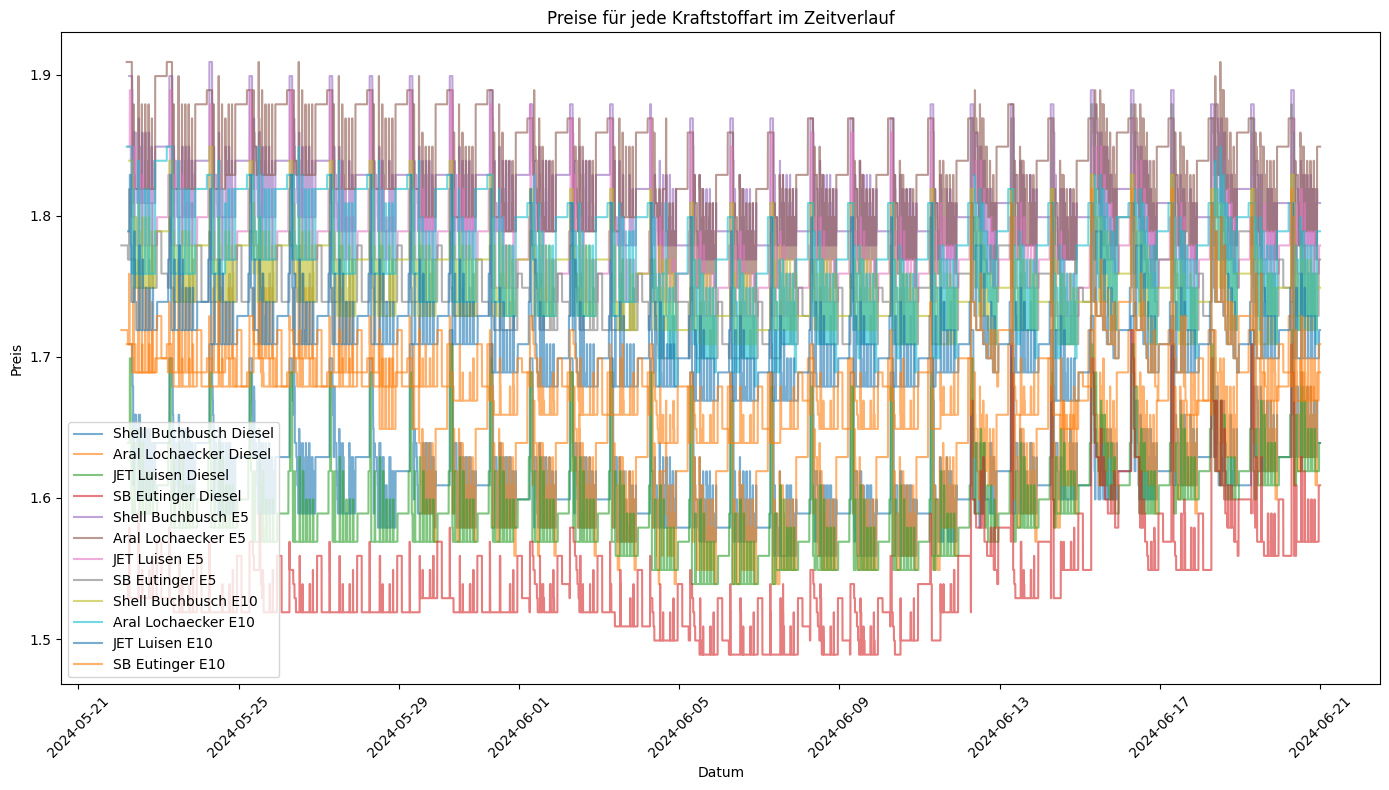

In [42]:
# Sicherstellen, dass das Datumsformat korrekt ist
WBW_df['date'] = pd.to_datetime(WBW_df['date'])

# Plot der Preise für jede Kraftstoffart im Zeitverlauf
plt.figure(figsize=(14, 8))

# Dieselpreise plotten
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)

# E5 Preise plotten
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)

# E10 Preise plotten
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)

# Titel und Labels hinzufügen
plt.title('Preise für jede Kraftstoffart im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Plot anzeigen
plt.show()

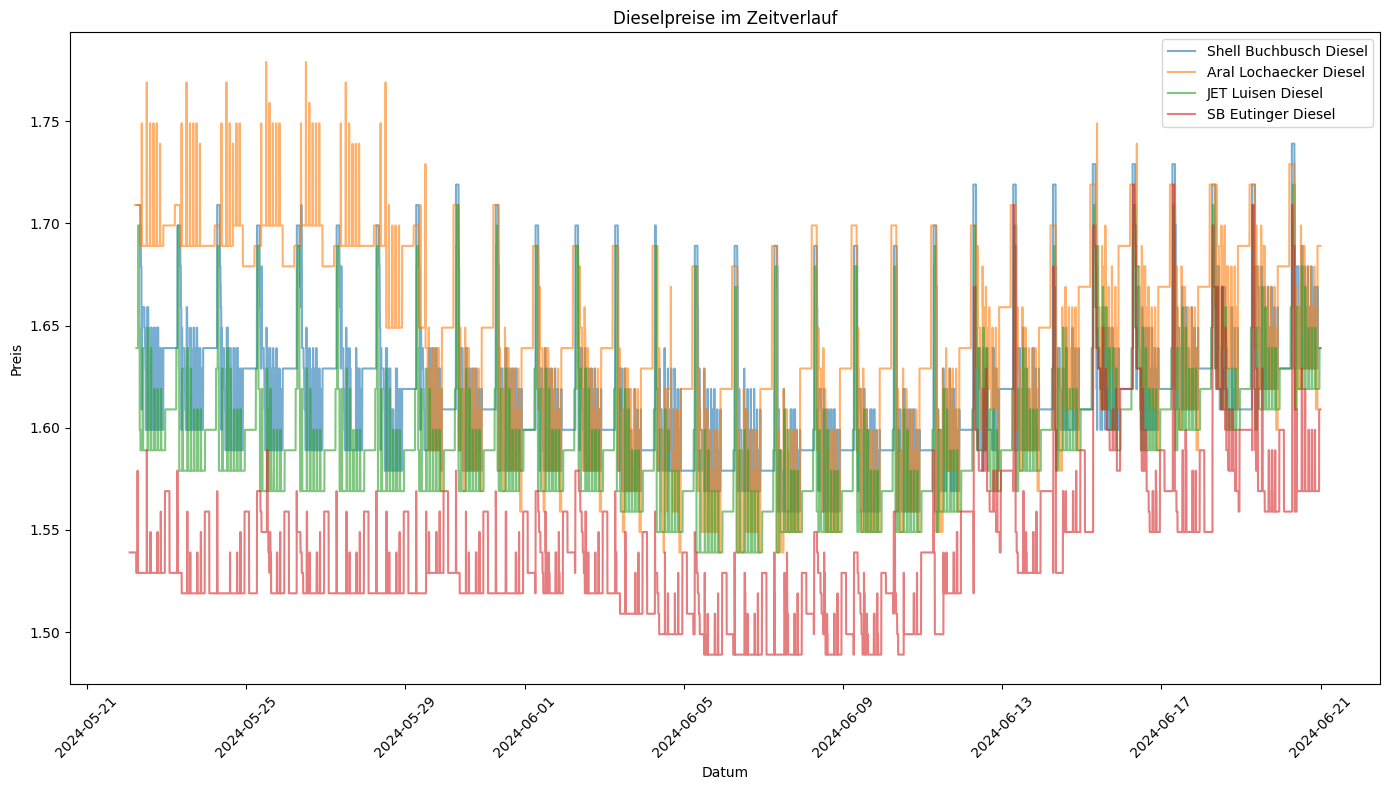

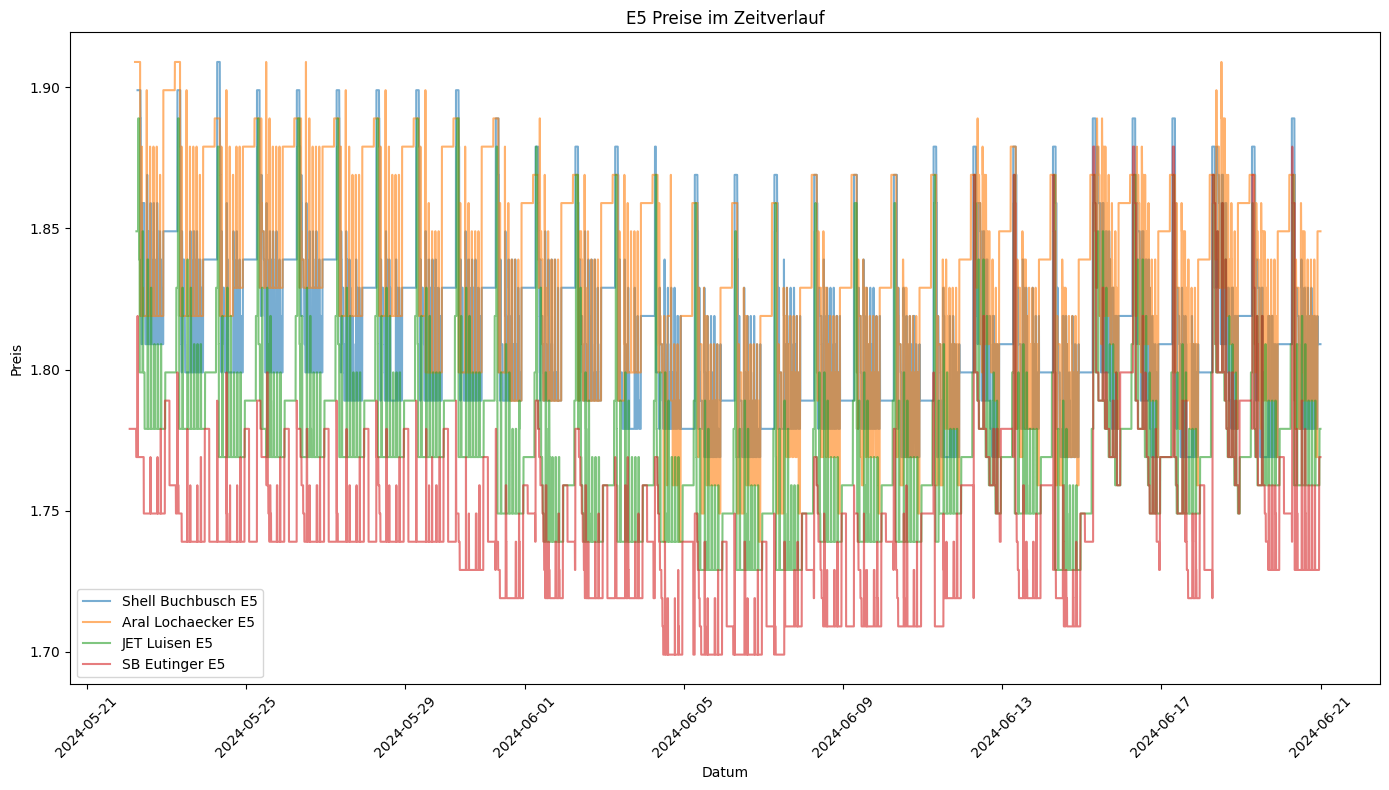

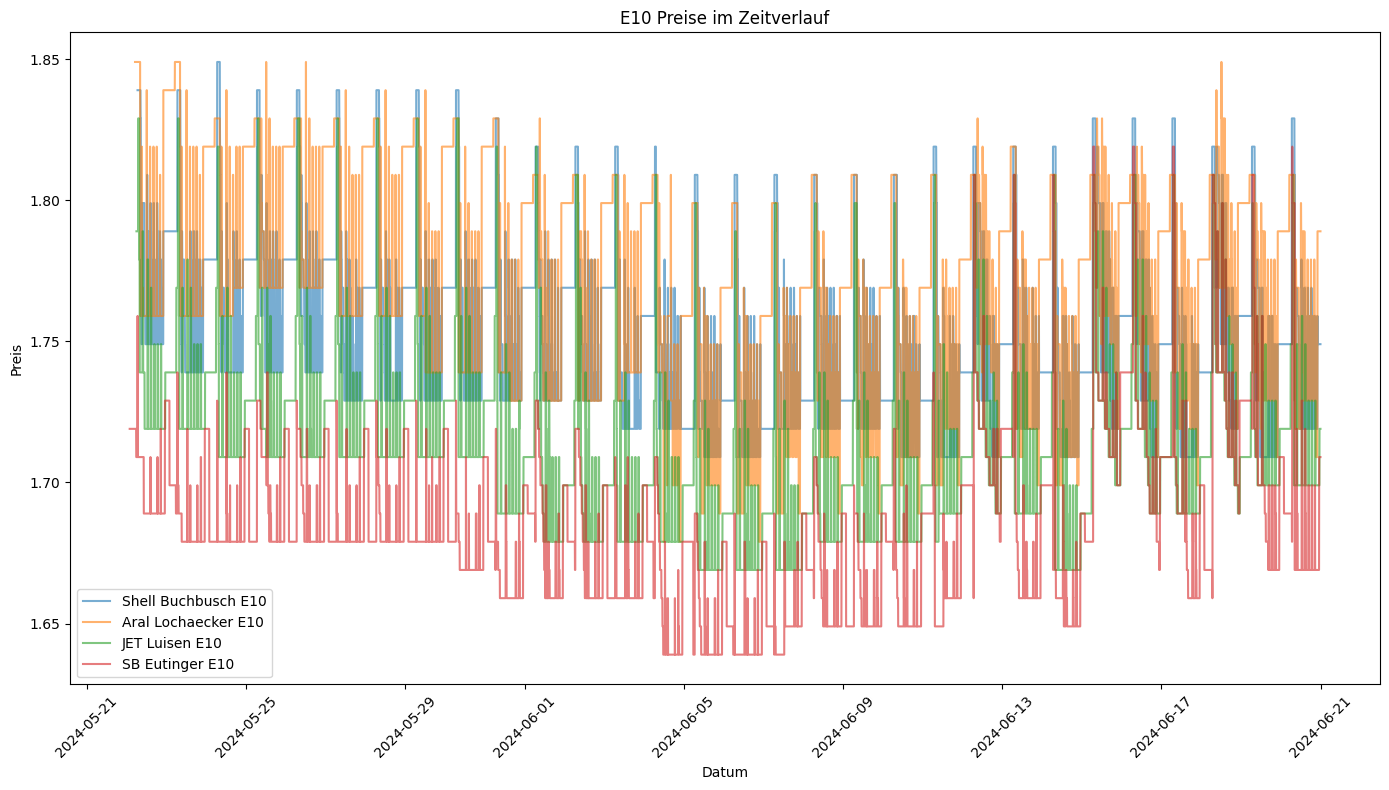

In [43]:
# Plot für Dieselpreise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)
plt.title('Dieselpreise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)
plt.title('E5 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)
plt.title('E10 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
# Sicherstellen, dass das Datumsformat korrekt ist
WBW_df['date'] = pd.to_datetime(WBW_df['date'])

# Datumsauswahl
selected_date = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df.head()

<ipython-input-61-ff7c60c4835d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,weekday,hour,minute,Shell_Buchbusch_diesel,Shell_Buchbusch_e5,Shell_Buchbusch_e10,Aral_Lochaecker_diesel,Aral_Lochaecker_e5,Aral_Lochaecker_e10,JET_Luisen_diesel,JET_Luisen_e5,JET_Luisen_e10,SB_Eutinger_diesel,SB_Eutinger_e5,SB_Eutinger_e10
11411,2024-05-30 00:00:00,3,0,0,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11412,2024-05-30 00:01:00,3,0,1,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11413,2024-05-30 00:02:00,3,0,2,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11414,2024-05-30 00:03:00,3,0,3,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11415,2024-05-30 00:04:00,3,0,4,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719


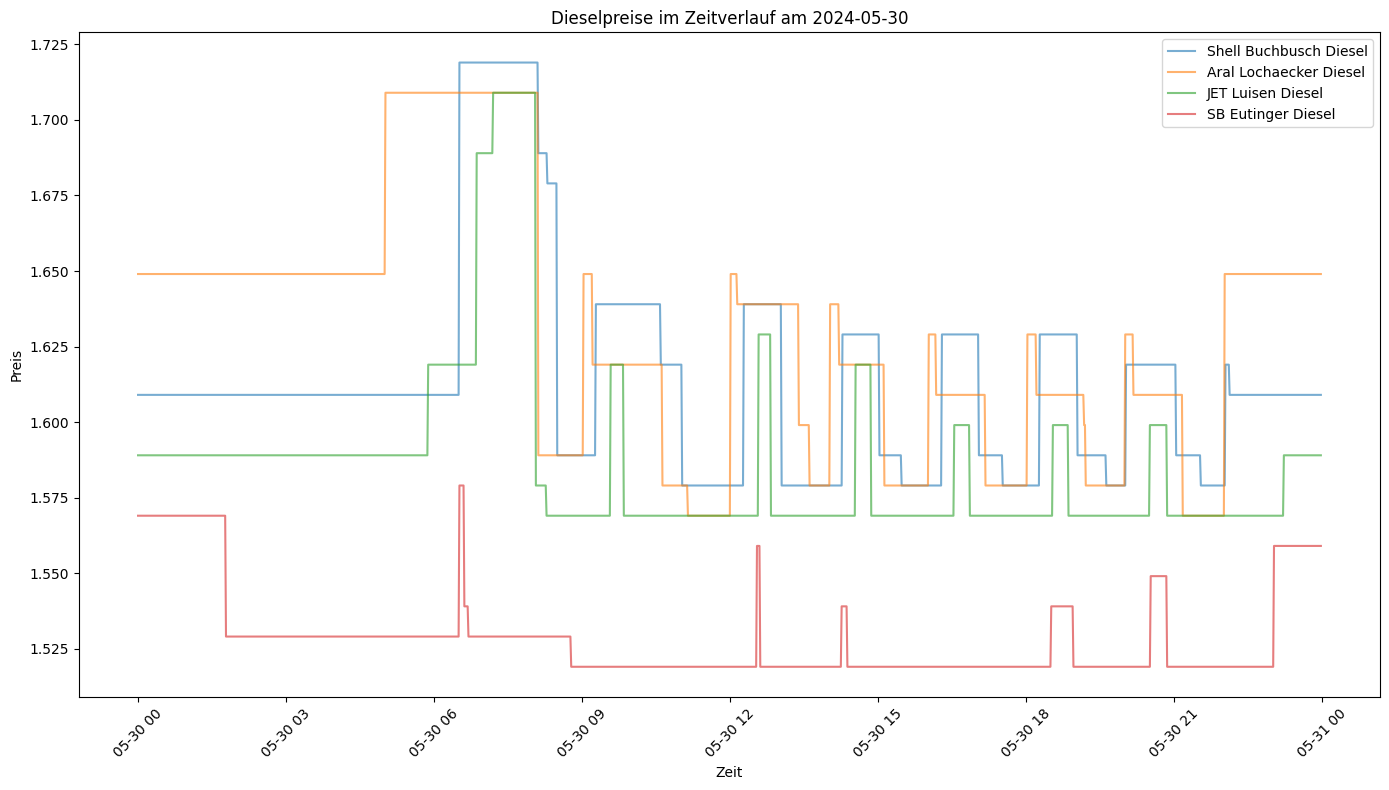

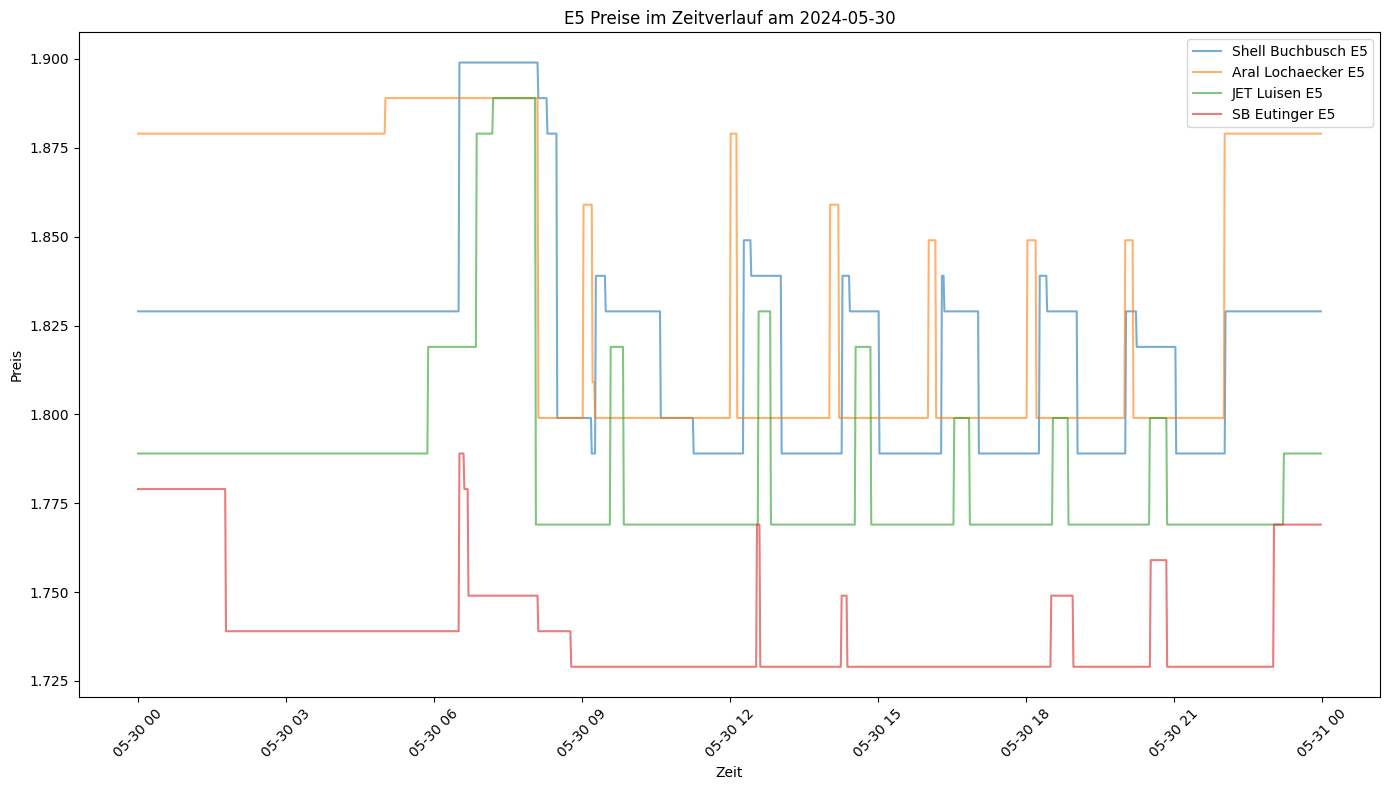

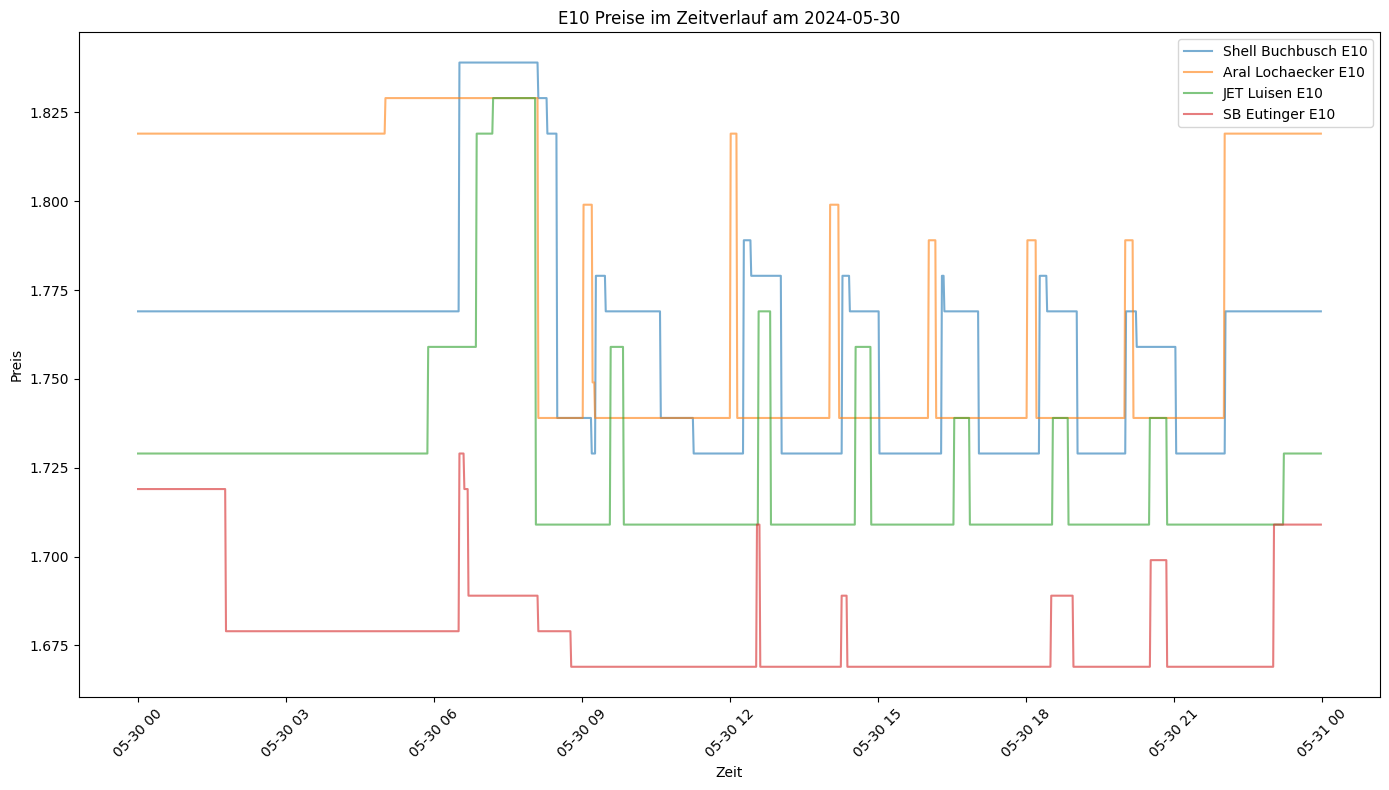

In [49]:
# Plot für Dieselpreise
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)
plt.title('Dieselpreise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)
plt.title('E5 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)
plt.title('E10 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

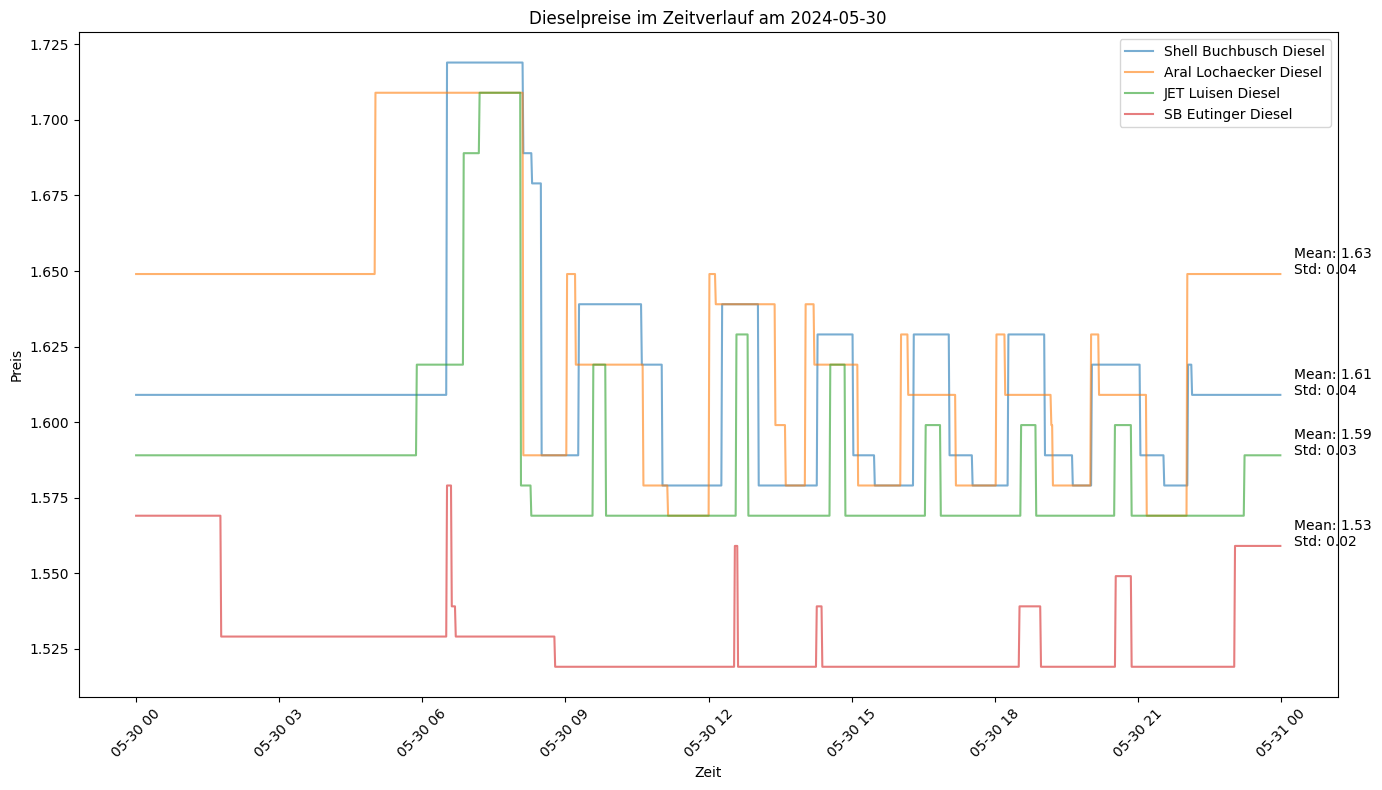

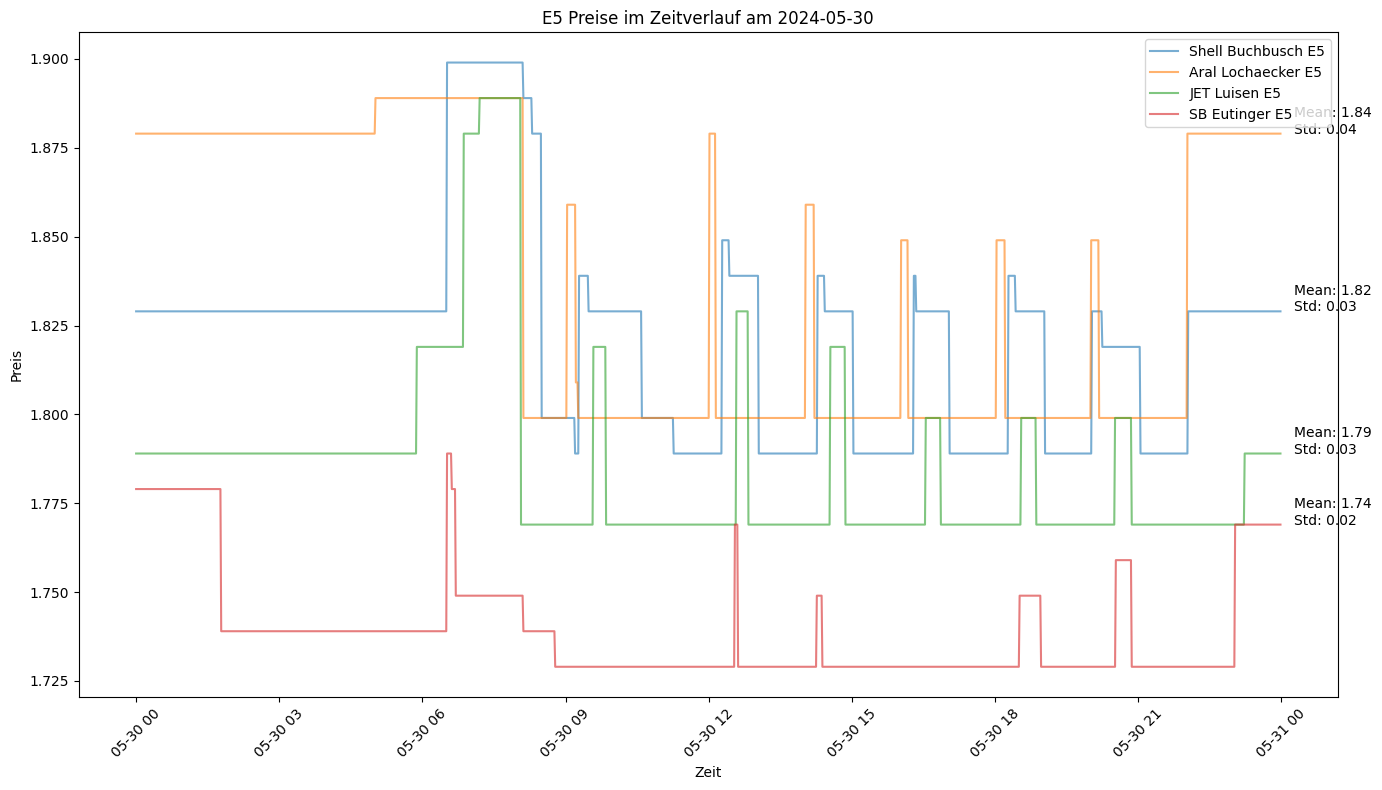

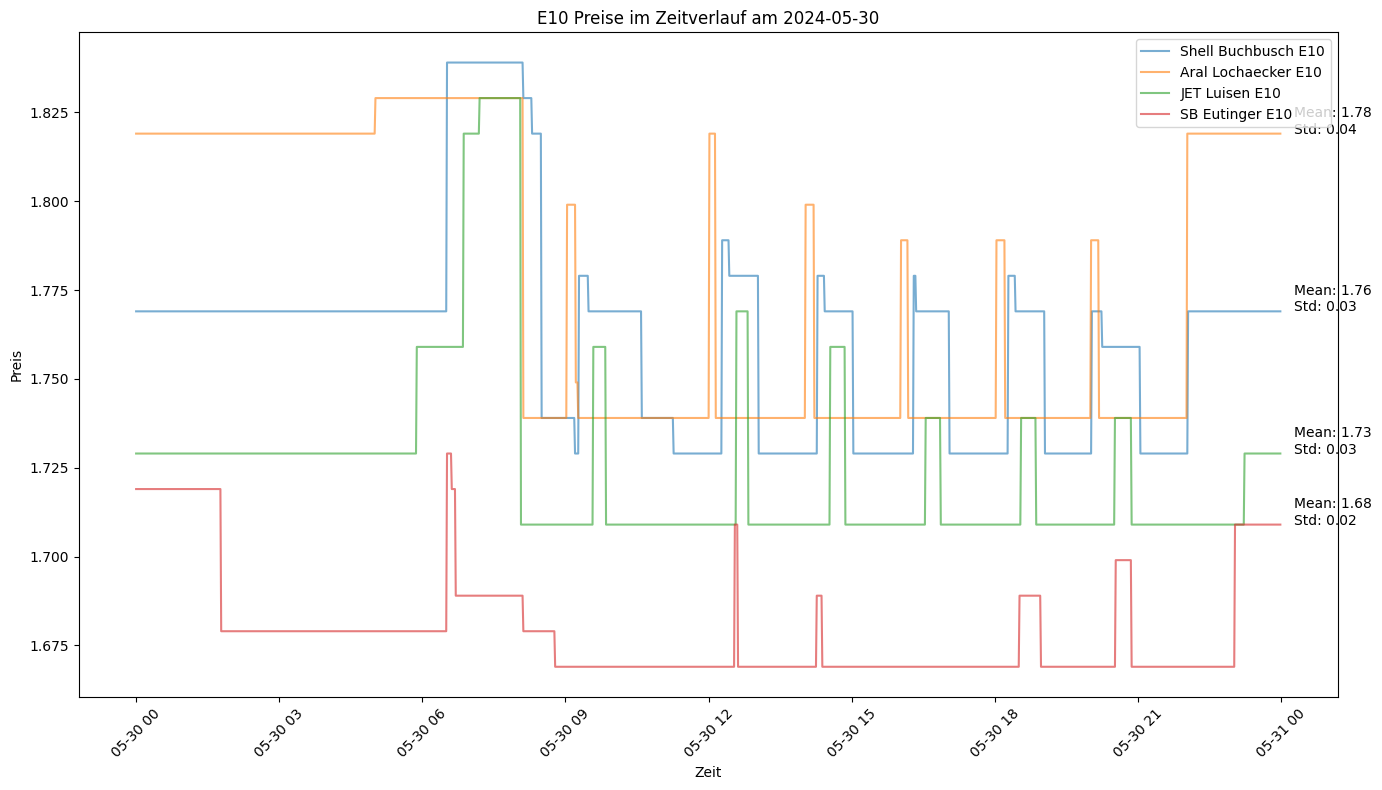

In [50]:
# Berechnung der durchschnittlichen Preise und Standardabweichungen für den ausgewählten Tag
mean_prices = filtered_df.mean()
std_prices = filtered_df.std()

# Plot für Dieselpreise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)

# Annotationen für Dieselpreise
for station in ['Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel', 'JET_Luisen_diesel', 'SB_Eutinger_diesel']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('Dieselpreise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)

# Annotationen für E5 Preise
for station in ['Shell_Buchbusch_e5', 'Aral_Lochaecker_e5', 'JET_Luisen_e5', 'SB_Eutinger_e5']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E5 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)

# Annotationen für E10 Preise
for station in ['Shell_Buchbusch_e10', 'Aral_Lochaecker_e10', 'JET_Luisen_e10', 'SB_Eutinger_e10']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E10 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap
**Erstellung einer Heatmap**

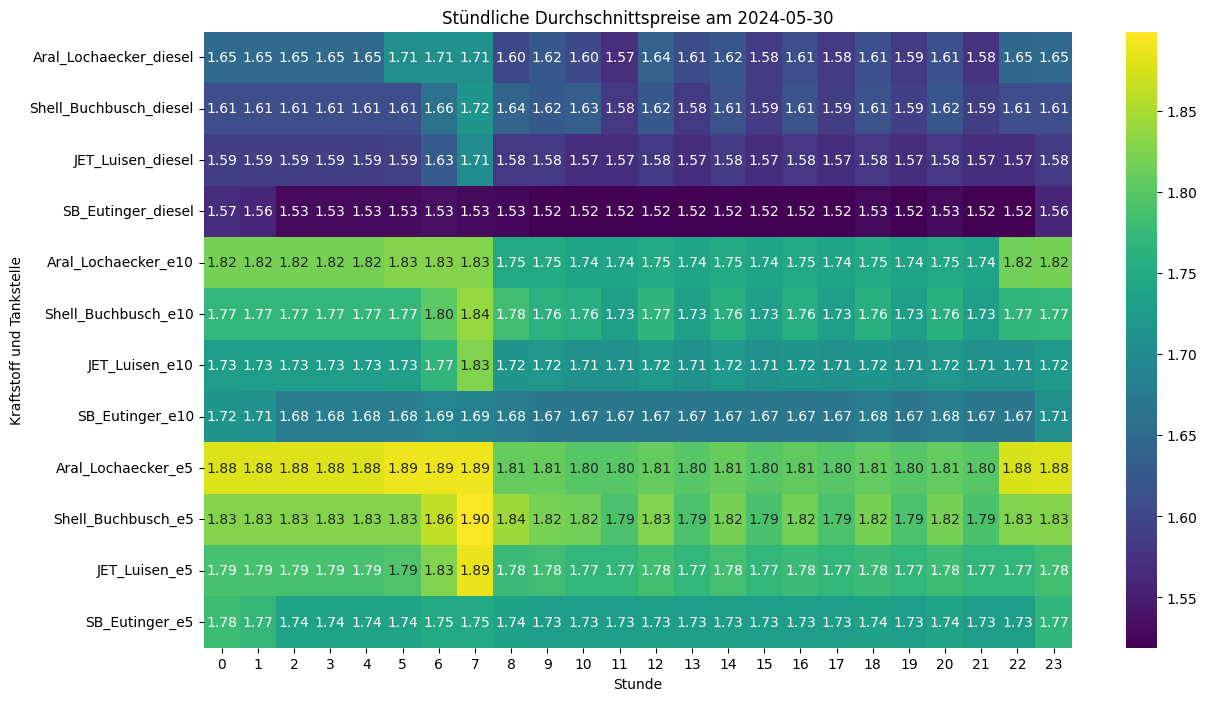

In [66]:
# Gruppierung nach Stunde und Berechnung des Durchschnittspreises
hourly_avg_prices = filtered_df.groupby('hour').mean()

# Anzeigen der stündlichen Durchschnittspreise
hourly_avg_prices.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der zu visualisierenden Spalten
heatmap_data = hourly_avg_prices[[
    'Aral_Lochaecker_diesel','Shell_Buchbusch_diesel',  'JET_Luisen_diesel', 'SB_Eutinger_diesel',
    'Aral_Lochaecker_e10','Shell_Buchbusch_e10','JET_Luisen_e10','SB_Eutinger_e10',
    'Aral_Lochaecker_e5','Shell_Buchbusch_e5',  'JET_Luisen_e5', 'SB_Eutinger_e5'
]]

# Erstellung der Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Stündliche Durchschnittspreise am 2024-05-30')
plt.xlabel('Stunde')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [68]:
WBW_core_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core.head()

<ipython-input-68-7768921ef6b3>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,weekday,hour,minute,Shell_Buchbusch_diesel,Shell_Buchbusch_e5,Shell_Buchbusch_e10,Aral_Lochaecker_diesel,Aral_Lochaecker_e5,Aral_Lochaecker_e10,JET_Luisen_diesel,JET_Luisen_e5,JET_Luisen_e10,SB_Eutinger_diesel,SB_Eutinger_e5,SB_Eutinger_e10
11411,2024-05-30 00:00:00,3,0,0,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11412,2024-05-30 00:01:00,3,0,1,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11413,2024-05-30 00:02:00,3,0,2,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11414,2024-05-30 00:03:00,3,0,3,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719
11415,2024-05-30 00:04:00,3,0,4,1.609,1.829,1.769,1.649,1.879,1.819,1.589,1.789,1.729,1.569,1.779,1.719


<ipython-input-79-787b51ba1f0b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



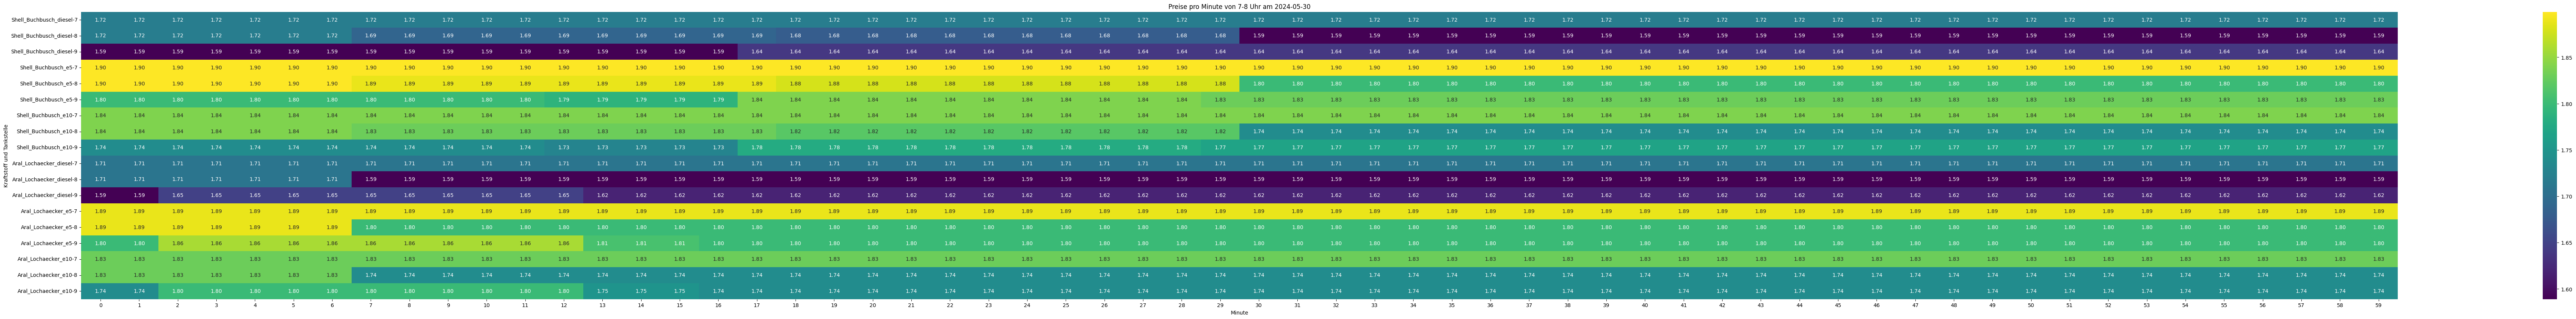

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und die spezifische Stunde filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 7) &
                               (WBW_core_df['hour'] < 10)]

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot(index='minute', columns='hour',
                                           values=[
                                               'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                               'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                           ]).T

# Erstellung der Heatmap
plt.figure(figsize=(100, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 7-8 Uhr am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

<ipython-input-81-9870edc3c6f0>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



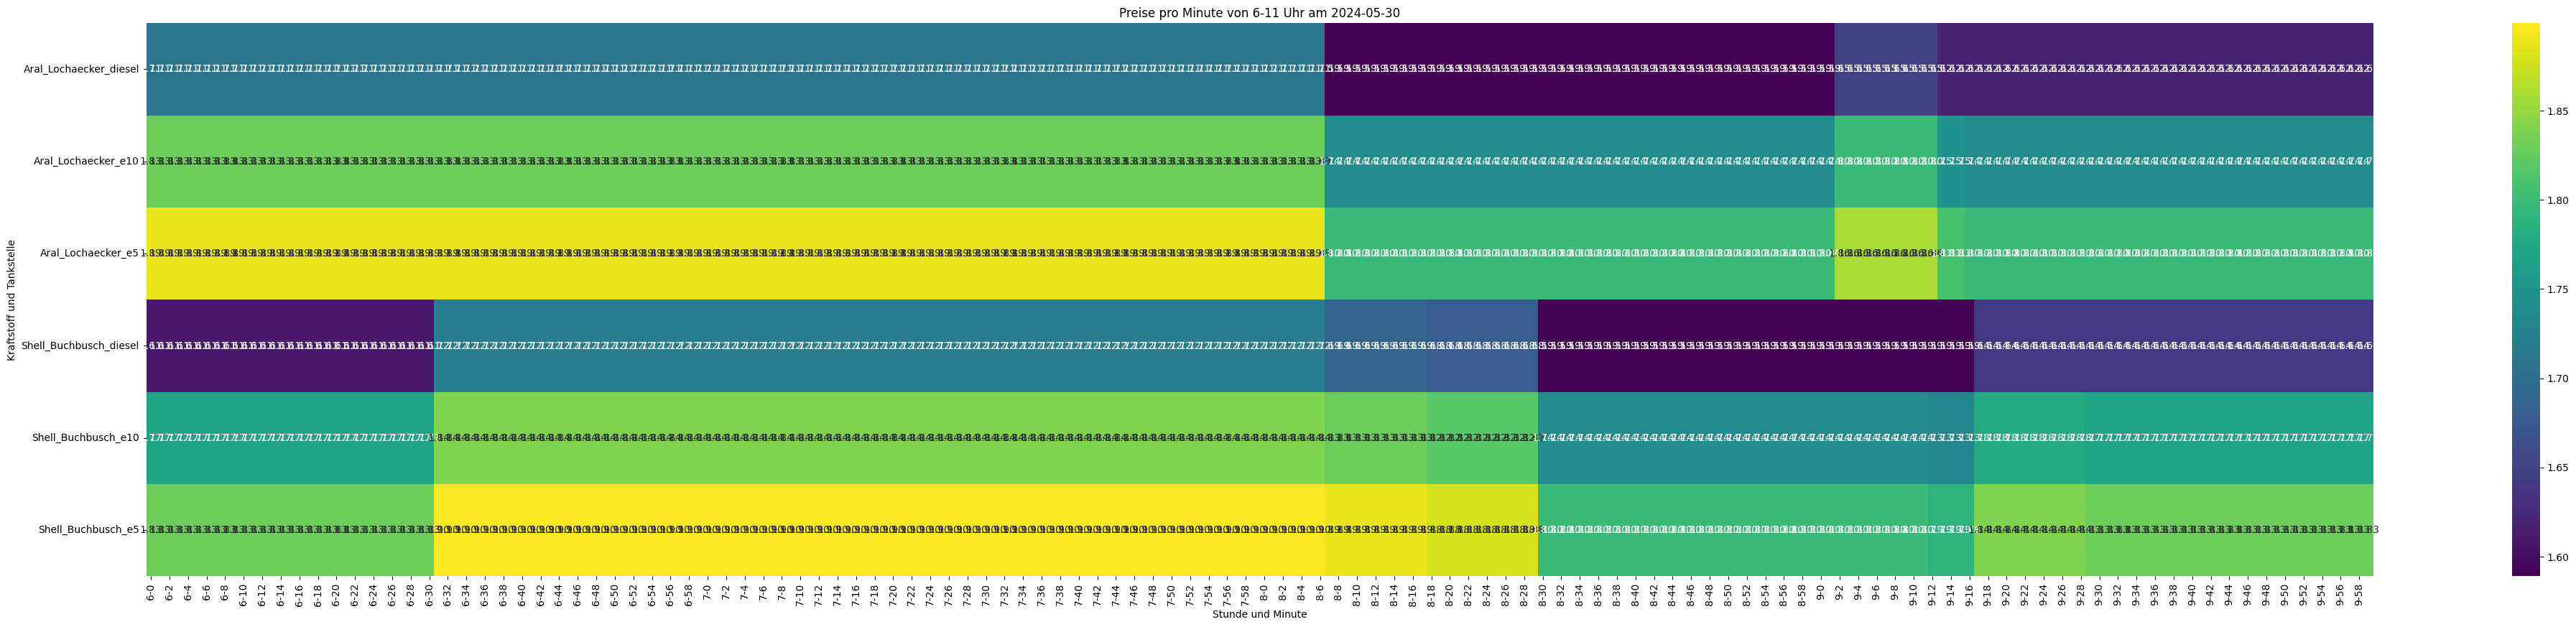

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und den spezifischen Zeitintervall filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 6) &
                               (WBW_core_df['hour'] < 10)]

# Vorbereitung der Daten für die Heatmap
filtered_df_core.set_index(['hour', 'minute'], inplace=True)

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot_table(index=['hour', 'minute'],
                                                 values=[
                                                     'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                                     'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                                 ]).T

# Erstellung der Heatmap
plt.figure(figsize=(50, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 6-11 Uhr am 2024-05-30')
plt.xlabel('Stunde und Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [85]:
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core_diesel.head()

<ipython-input-85-3752a809c598>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,weekday,hour,minute,Shell_Buchbusch_diesel,Aral_Lochaecker_diesel
11411,2024-05-30 00:00:00,3,0,0,1.609,1.649
11412,2024-05-30 00:01:00,3,0,1,1.609,1.649
11413,2024-05-30 00:02:00,3,0,2,1.609,1.649
11414,2024-05-30 00:03:00,3,0,3,1.609,1.649
11415,2024-05-30 00:04:00,3,0,4,1.609,1.649


In [88]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['shell_dif'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff()
filtered_df_core_diesel['aral_dif'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()

# Anzeigen der gefilterten Daten mit den Differenzspalten
print(filtered_df_core_diesel)

                     date  weekday  hour  minute  Shell_Buchbusch_diesel  \
11411 2024-05-30 00:00:00        3     0       0                   1.609   
11412 2024-05-30 00:01:00        3     0       1                   1.609   
11413 2024-05-30 00:02:00        3     0       2                   1.609   
11414 2024-05-30 00:03:00        3     0       3                   1.609   
11415 2024-05-30 00:04:00        3     0       4                   1.609   
...                   ...      ...   ...     ...                     ...   
12846 2024-05-30 23:55:00        3    23      55                   1.609   
12847 2024-05-30 23:56:00        3    23      56                   1.609   
12848 2024-05-30 23:57:00        3    23      57                   1.609   
12849 2024-05-30 23:58:00        3    23      58                   1.609   
12850 2024-05-30 23:59:00        3    23      59                   1.609   

       Aral_Lochaecker_diesel  shell_dif  aral_dif  
11411                   1.649     

<ipython-input-88-c9c2d1dfad55>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-c9c2d1dfad55>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-c9c2d1dfad55>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Aral_diesel-shell_diesel'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent
filtered_df_core_diesel['Preisänderungin%'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].pct_change() * 100  # Prozentuale Preisänderung
filtered_df_core_diesel['Preisänderung'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()  # Absolute Preisänderung

# Delta Zeiten der Preisänderungen berechnen
filtered_df_core_diesel['Delta_zeitenpreisänderung'] = filtered_df_core_diesel['date'].diff().apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else 0)

# Zeit bis zur nächsten Änderung berechnen
filtered_df_core_diesel['ZeitnächsteÄnderung'] = filtered_df_core_diesel['Delta_zeitenpreisänderung'].shift(-1)

# Vergleich der prozentualen Preisänderungen bei Änderung (Aral vs. Shell)
filtered_df_core_diesel['VergleichbeiderProzentePReisbeiÄnderung'] = filtered_df_core_diesel['Preisänderungin%'] - filtered_df_core_diesel['Shell_Buchbusch_diesel'].pct_change() * 100

# Anzeigen der gefilterten Daten mit den neuen Spalten
filtered_df_core_diesel.head()

<ipython-input-90-7838dc1e0195>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-7838dc1e0195>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-7838dc1e0195>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-7838

,date,weekday,hour,minute,Shell_Buchbusch_diesel,Aral_Lochaecker_diesel,Differenz_preiszeile_aral_diesel_min2-1,Aral_diesel-shell_diesel,Preisänderungin%,Preisänderung,Delta_zeitenpreisänderung,ZeitnächsteÄnderung,VergleichbeiderProzentePReisbeiÄnderung
11411,2024-05-30 00:00:00,3,0,0,1.609,1.649,NaN,4.0,NaN,NaN,0.0,1.0,NaN
11412,2024-05-30 00:01:00,3,0,1,1.609,1.649,0.0,4.0,0.0,0.0,1.0,1.0,0.0
11413,2024-05-30 00:02:00,3,0,2,1.609,1.649,0.0,4.0,0.0,0.0,1.0,1.0,0.0
11414,2024-05-30 00:03:00,3,0,3,1.609,1.649,0.0,4.0,0.0,0.0,1.0,1.0,0.0
11415,2024-05-30 00:04:00,3,0,4,1.609,1.649,0.0,4.0,0.0,0.0,1.0,1.0,0.0


<ipython-input-93-63586ef3b531>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-63586ef3b531>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



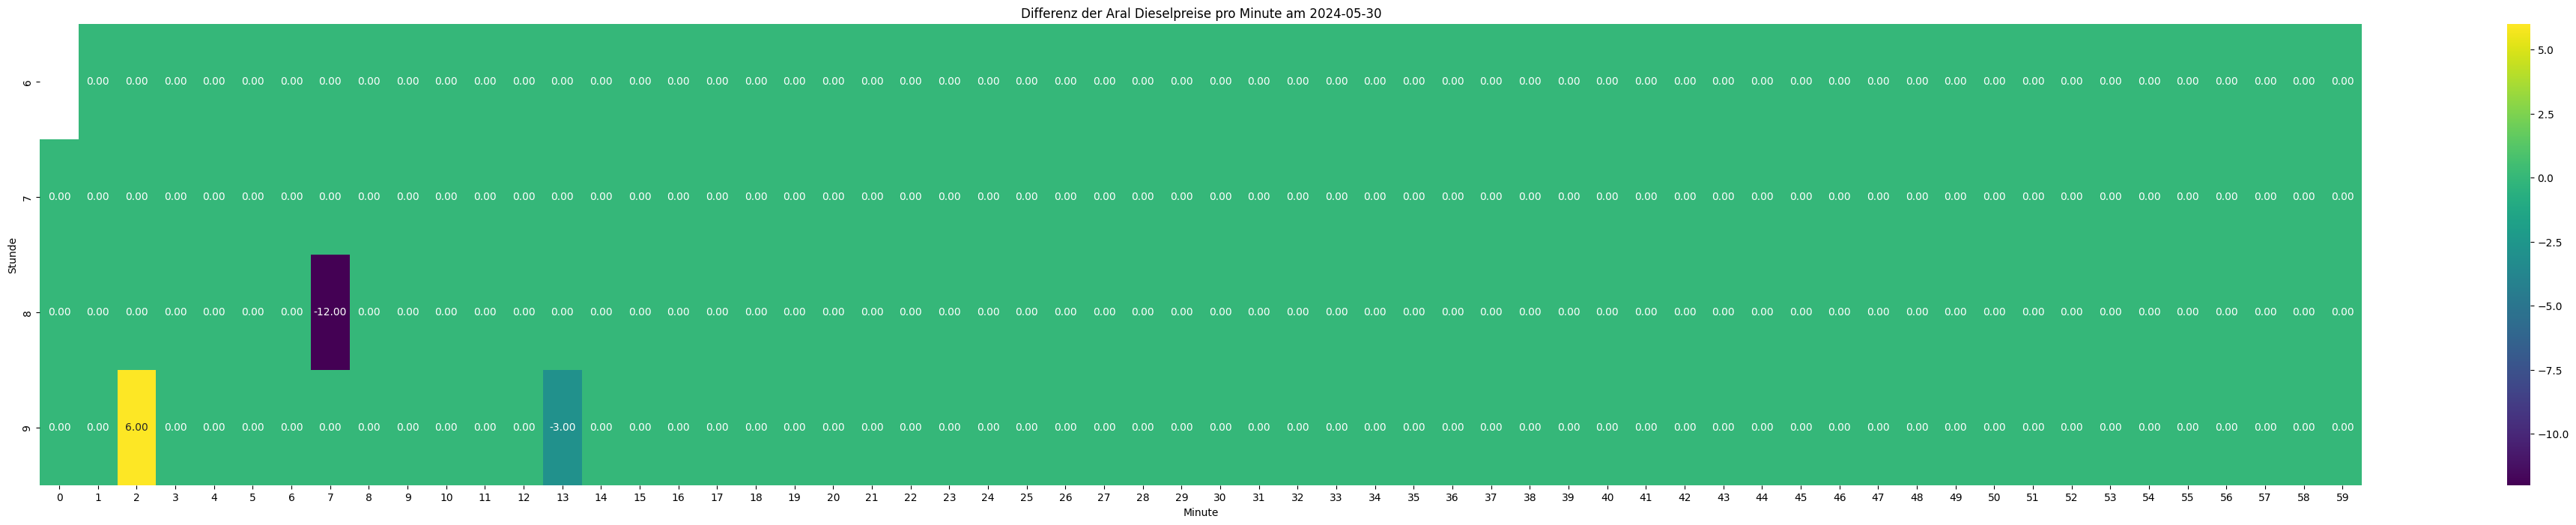

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                               (WBW_core_df_diesel['hour'] >= 6) &
                               (WBW_core_df_diesel['hour'] < 10)]



# Differenzspalte hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')

# Erstellung der Heatmap
plt.figure(figsize=(50, 8))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

<ipython-input-95-eaf82f119b96>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-eaf82f119b96>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-eaf82f119b96>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-eaf82

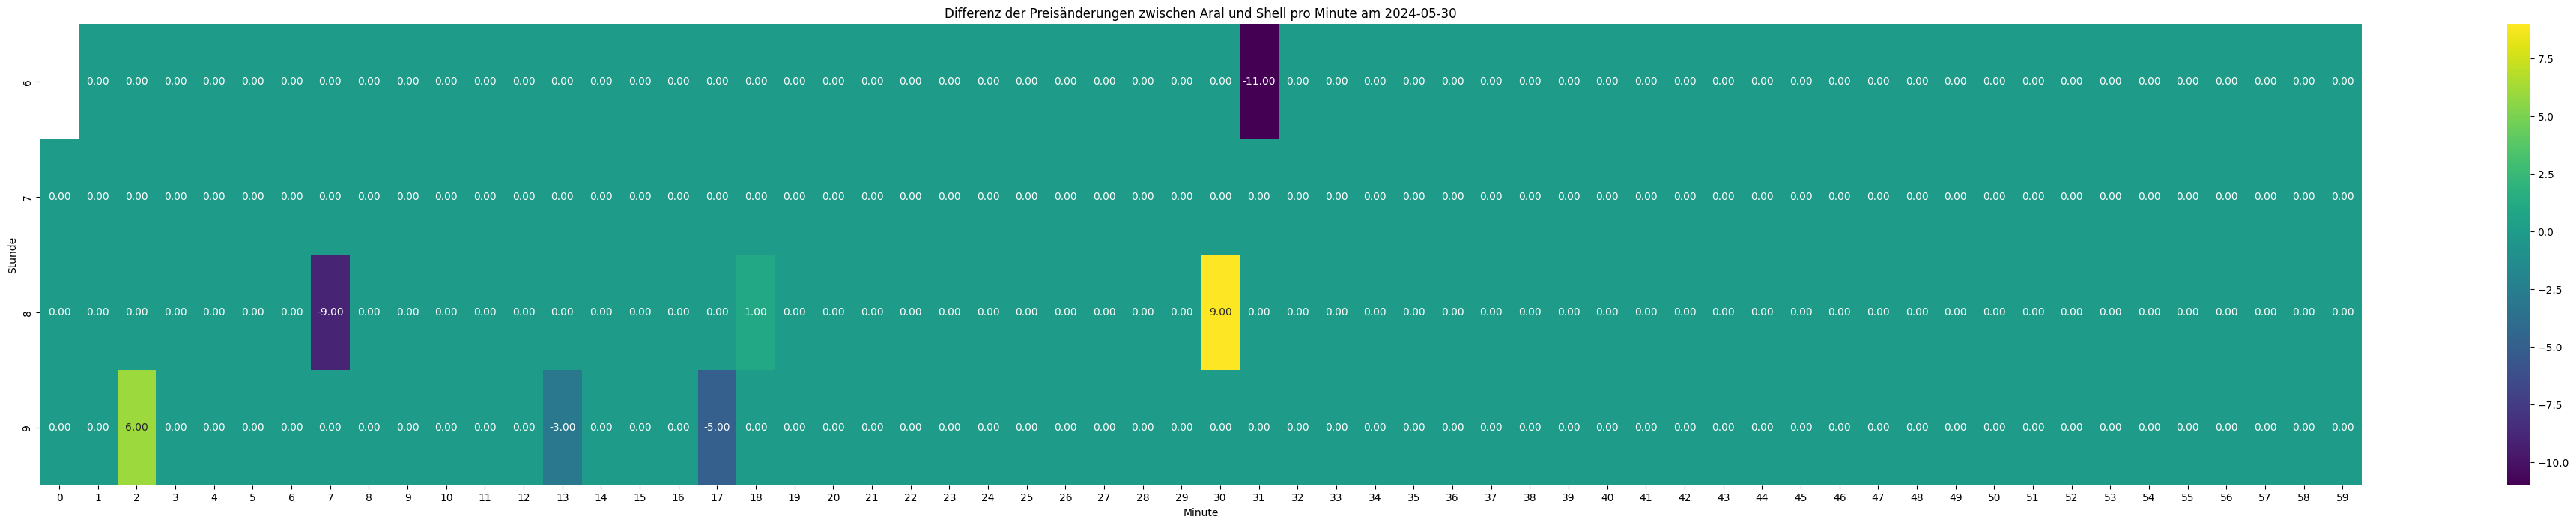

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 6) &
                                             (WBW_core_df_diesel['hour'] < 10)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Differenz zwischen den Preisänderungen von Aral und Shell
filtered_df_core_diesel['Differenz_Aral_Shell'] = filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] - filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1']

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_Aral_Shell')

# Erstellung der Heatmap
plt.figure(figsize=(50, 8))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Preisänderungen zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

<ipython-input-98-2d611344cf94>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-2d611344cf94>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-2d611344cf94>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-2d611

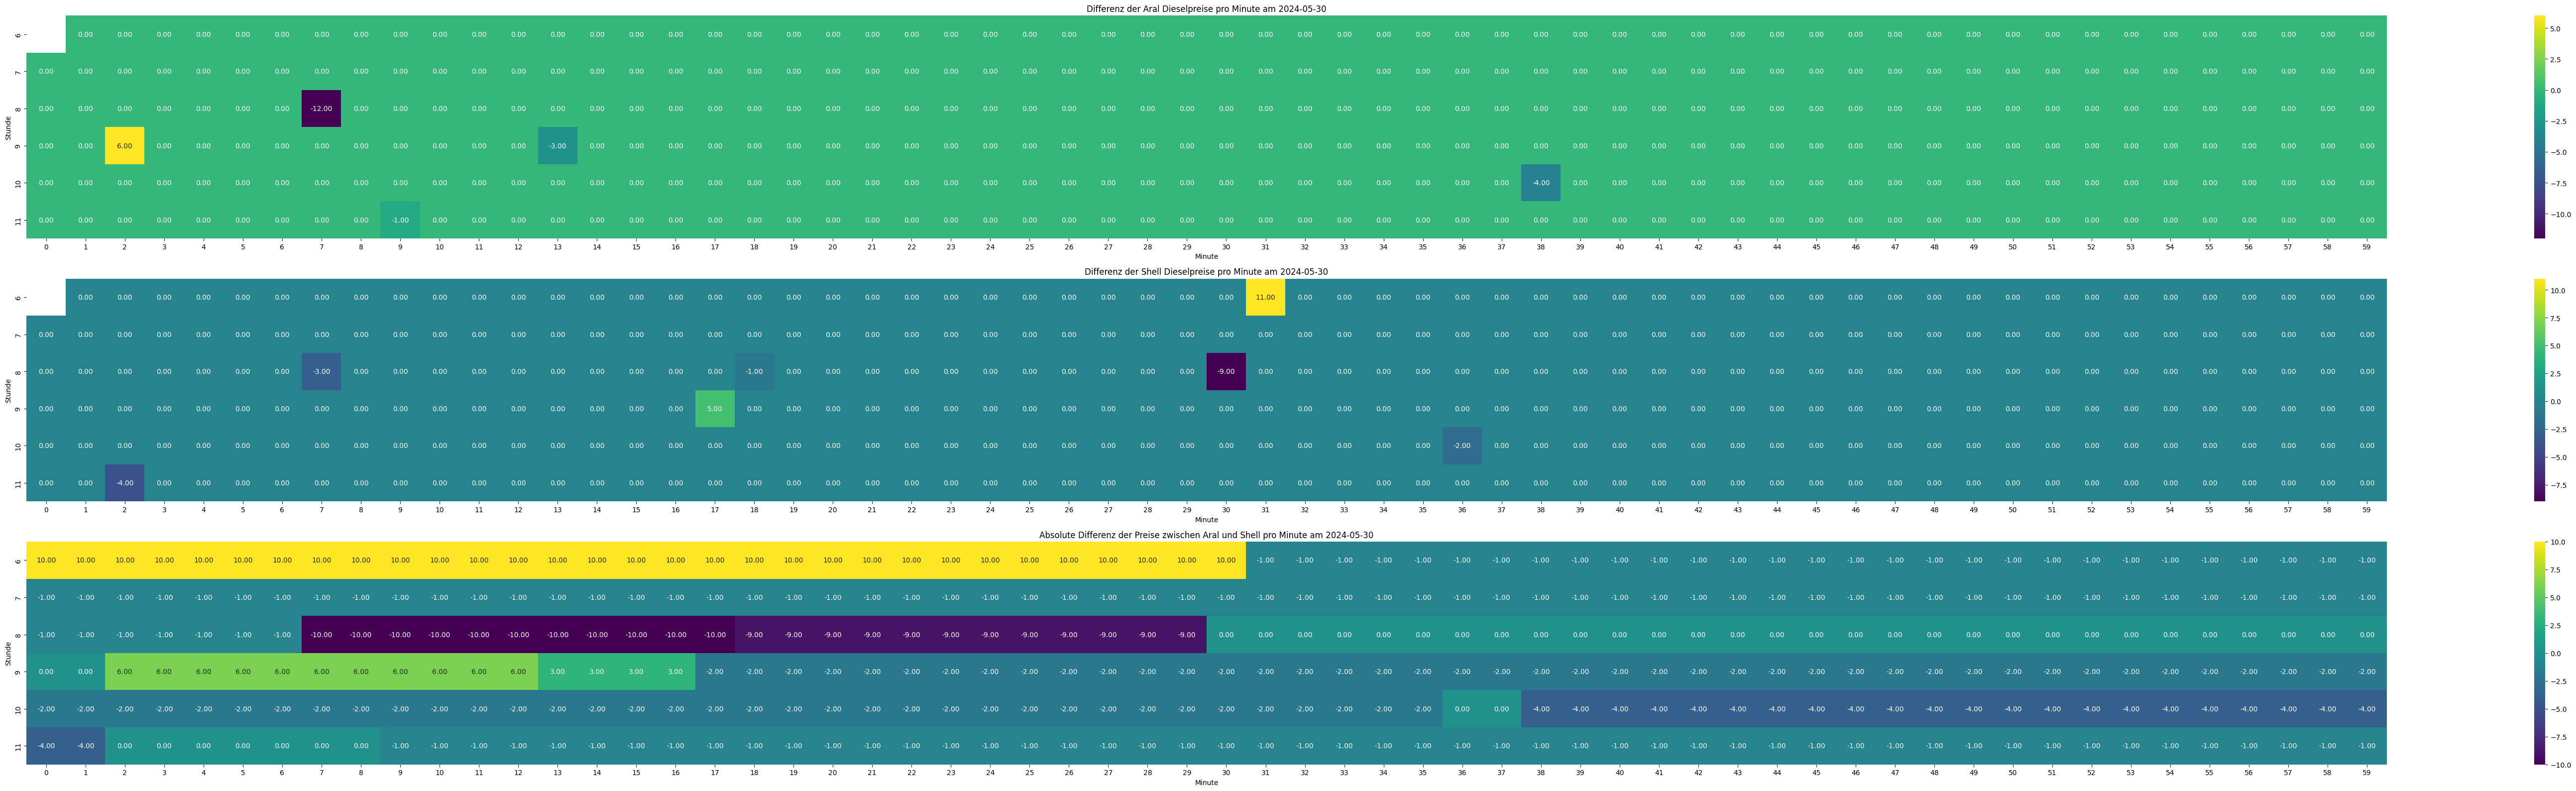

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 6) &
                                             (WBW_core_df_diesel['hour'] < 12)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Absolute Differenz zwischen den Preisen von Aral und Shell
filtered_df_core_diesel['Absolute_Differenz_Aral_Shell'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent

# Vorbereitung der Daten für die Heatmaps
pivot_aral = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')
pivot_shell = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_shell_diesel_min2-1')
pivot_abs_diff = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Absolute_Differenz_Aral_Shell')

# Erstellung der Heatmaps
plt.figure(figsize=(60, 16))

plt.subplot(3, 1, 1)
sns.heatmap(pivot_aral, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 2)
sns.heatmap(pivot_shell, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Shell Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 3)
sns.heatmap(pivot_abs_diff, cmap='viridis', annot=True, fmt=".2f")
plt.title('Absolute Differenz der Preise zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.tight_layout()
plt.show()